<a href="https://colab.research.google.com/github/krishnaaxo/TPOT_Automl_classification/blob/main/TPOT_Automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('/content/Taiwan.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [3]:
print("Column names before renaming","\n", df.columns[:5],"\n")
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" " ,"_")
df.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)
print("Column names after renaming","\n",df.columns[:5])

Column names before renaming 
 Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin'],
      dtype='object') 

Column names after renaming 
 Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin'],
      dtype='object')


In [4]:
df.head().T

,0,1,2,3,4
Bankrupt,1.000000,1.000000,1.000000,1.000000,1.000000
ROA(C)_before_interest_and_depreciation_before_interest,0.370594,0.464291,0.426071,0.399844,0.465022
ROA(A)_before_interest_and_%_after_tax,0.424389,0.538214,0.499019,0.451265,0.538432
ROA(B)_before_interest_and_depreciation_after_tax,0.405750,0.516730,0.472295,0.457733,0.522298
Operating_Gross_Margin,0.601457,0.610235,0.601450,0.583541,0.598783
...,...,...,...,...,...
Liability_to_Equity,0.290202,0.283846,0.290189,0.281721,0.278514
Degree_of_Financial_Leverage_(DFL),0.026601,0.264577,0.026555,0.026697,0.024752
Interest_Coverage_Ratio_(Interest_expense_to_EBIT),0.564050,0.570175,0.563706,0.564663,0.575617
Net_Income_Flag,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt                                                 6819 non-null   int64  
 1   ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   Operating_Gross_Margin                                   6819 non-null   float64
 5   Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   Operating_Profit_Rate                                    6819 non-null   float64
 7   Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   After-tax_net_Interest_Rate 

In [6]:
df.describe()

,Bankrupt,ROA(C)_before_interest_and_depreciation_before_interest,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Continuous_interest_rate_(after_tax),Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest-bearing_debt_interest_rate,Tax_rate_(A),Net_Value_Per_Share_(B),Net_Value_Per_Share_(A),Net_Value_Per_Share_(C),Persistent_EPS_in_the_Last_Four_Seasons,Cash_Flow_Per_Share,Revenue_Per_Share_(Yuan_¥),Operating_Profit_Per_Share_(Yuan_¥),Per_Share_Net_profit_before_tax_(Yuan_¥),Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,After-tax_Net_Profit_Growth_Rate,Regular_Net_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Cash_Reinvestment_%,Current_Ratio,Quick_Ratio,Interest_Expense_Ratio,Total_debt/Total_net_worth,Debt_ratio_%,Net_worth/Assets,Long-term_fund_suitability_ratio_(A),...,Current_Assets/Total_Assets,Cash/Total_Assets,Quick_Assets/Current_Liability,Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Total_expense/Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Working_capitcal_Turnover_Rate,Cash_Turnover_Rate,Cash_Flow_to_Sales,Fixed_Assets_to_Assets,Current_Liability_to_Liability,Current_Liability_to_Equity,Equity_to_Long-term_Liability,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability-Assets_Flag,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Net_Income_Flag,Equity_to_Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,

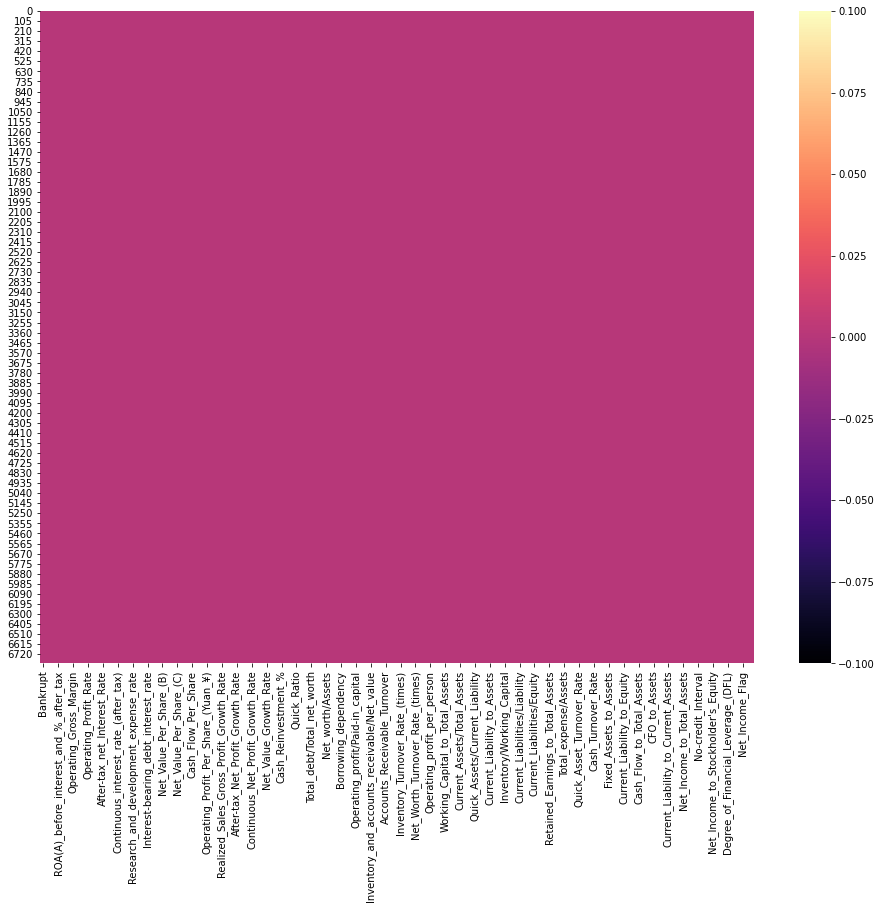

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

In [8]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [9]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [10]:
df.columns[var_thres.get_support()]

Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin',
       'Operating_Profit_Rate', 'Pre-tax_net_Interest_Rate',
       'After-tax_net_Interest_Rate',
       'Non-industry_income_and_expenditure/revenue',
       'Continuous_interest_rate_(after_tax)', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest-bearing_debt_interest_rate', 'Tax_rate_(A)',
       'Net_Value_Per_Share_(B)', 'Net_Value_Per_Share_(A)',
       'Net_Value_Per_Share_(C)', 'Persistent_EPS_in_the_Last_Four_Seasons',
       'Cash_Flow_Per_Share', 'Revenue_Per_Share_(Yuan_¥)',
       'Operating_Profit_Per_Share_(Yuan_¥)',
       'Per_Share_Net_profit_before_tax_(Yuan_¥)',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'After-tax_

In [11]:

constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [12]:
for feature in constant_columns:
     print(feature)

Net_Income_Flag


In [13]:
del df['Net_Income_Flag']

In [17]:
df.shape

(6819, 95)

In [19]:
df.duplicated(keep=False).sum()

0

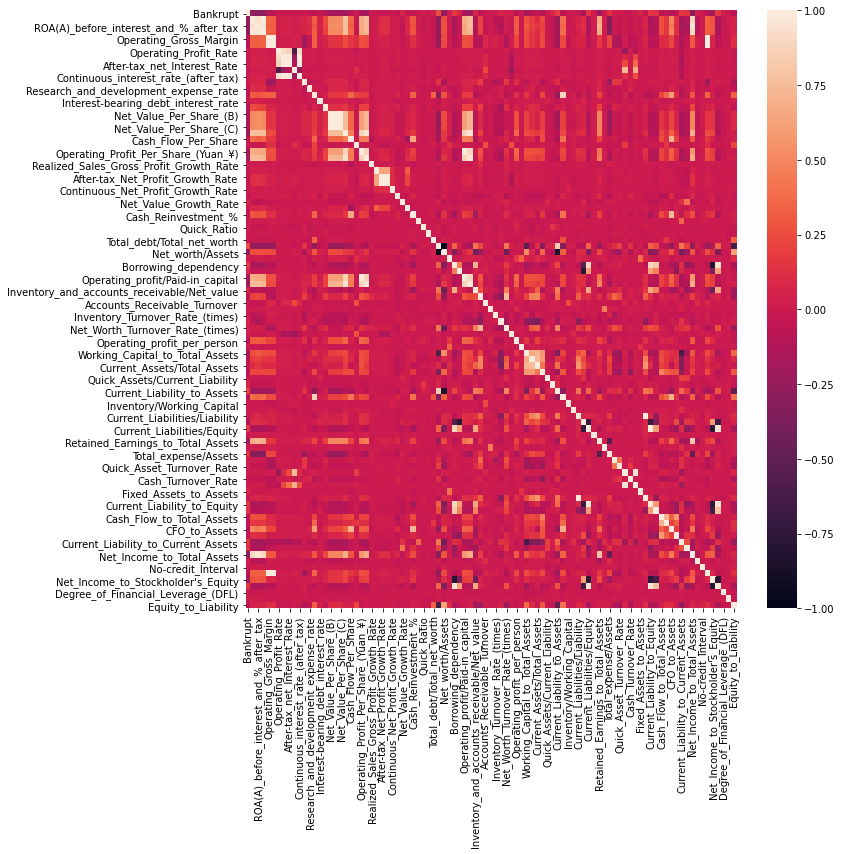

In [21]:
import seaborn as sns
#Using Pearson Correlation
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [22]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

19

In [24]:
corr_features

{'After-tax_net_Interest_Rate',
 'Cash_Flow_to_Sales',
 'Continuous_interest_rate_(after_tax)',
 'Current_Liability_to_Equity',
 'Current_Liability_to_Liability',
 'Gross_Profit_to_Sales',
 'Liability_to_Equity',
 'Net_Income_to_Total_Assets',
 'Net_Value_Per_Share_(A)',
 'Net_Value_Per_Share_(C)',
 'Net_profit_before_tax/Paid-in_capital',
 'Net_worth/Assets',
 'Operating_profit/Paid-in_capital',
 'Per_Share_Net_profit_before_tax_(Yuan_¥)',
 'Pre-tax_net_Interest_Rate',
 'ROA(A)_before_interest_and_%_after_tax',
 'ROA(B)_before_interest_and_depreciation_after_tax',
 'Realized_Sales_Gross_Margin',
 'Regular_Net_Profit_Growth_Rate'}

In [25]:
df=df.drop(corr_features,axis=1)

In [26]:
df.shape

(6819, 76)

In [28]:
df['Bankrupt'].unique()

array([1, 0])

In [31]:
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (df[col].max()<=1) & (df[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=df.drop(['Bankrupt'],axis=1))
non_fraction_columns = df.drop(['Bankrupt'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 51 	 # Other than Fraction-only Columns 24


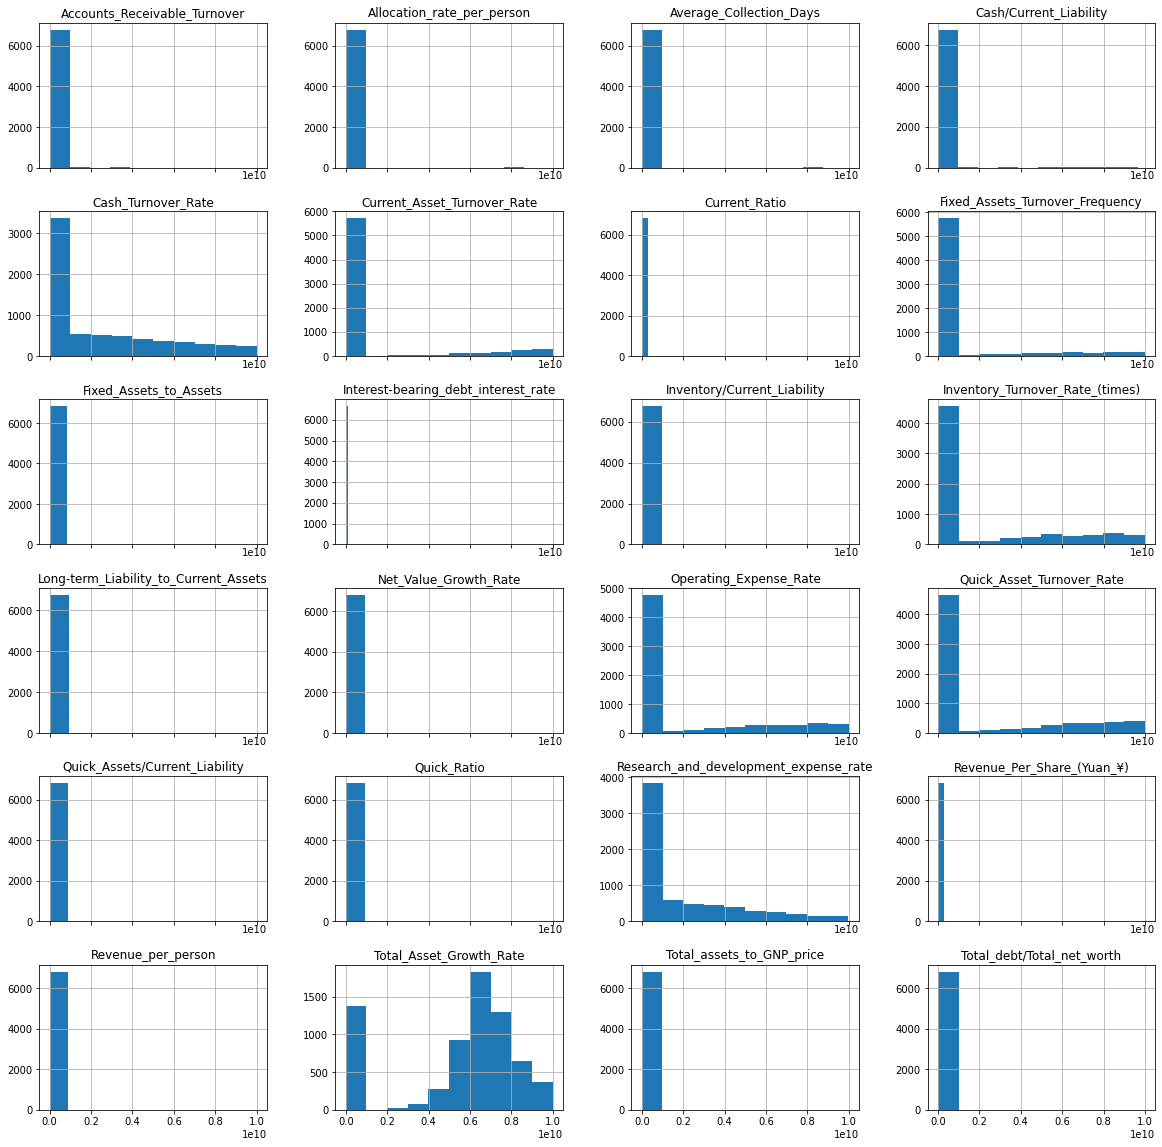

In [33]:
df[non_fraction_columns].hist(figsize= (20,20),sharex=True,layout= (6,4))
plt.show()

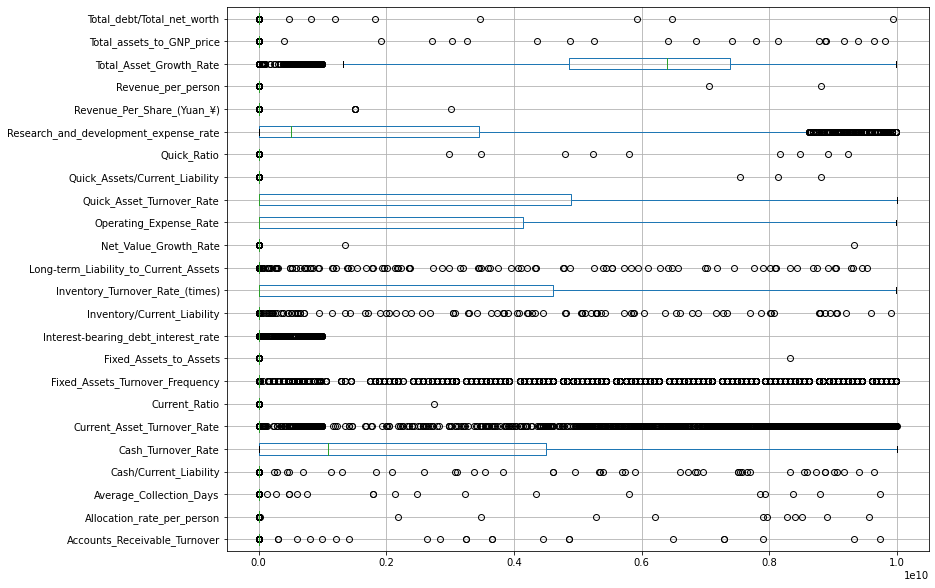

In [34]:
df[non_fraction_columns].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.show()

In [38]:
log_transformed_cols = []
for col in df[non_fraction_columns].columns:
    if (df[col].quantile(1) >= 100* df[col].quantile(0.99)) |  (sum(df[col] > df[col].quantile(0.99)) <= 10):
        df[col] = np.log1p(df[col])
        log_transformed_cols.append(col)
        
## Change names of log transformed column
log_names = "log_" + df[log_transformed_cols].columns
df.rename(columns={df[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)

The following features are log transformed after they fulfill outlier detection condition. 

 ['Accounts_Receivable_Turnover', 'Allocation_rate_per_person', 'Average_Collection_Days', 'Cash/Current_Liability', 'Current_Ratio', 'Net_Value_Growth_Rate', 'Quick_Assets/Current_Liability', 'Quick_Ratio', 'Revenue_Per_Share_(Yuan_¥)', 'Total_assets_to_GNP_price', 'Total_debt/Total_net_worth']


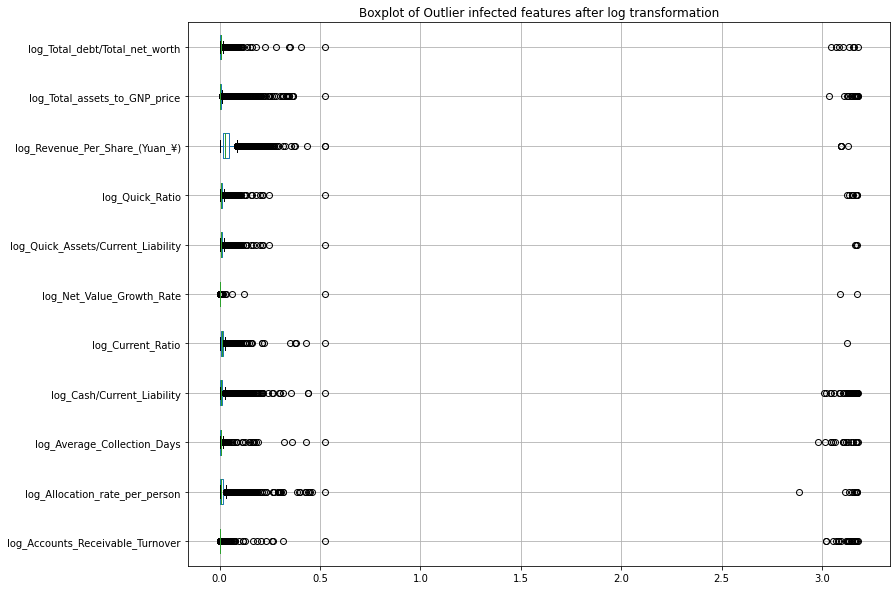

In [39]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
df[log_names].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

In [40]:
df1 = pd.DataFrame(df.Bankrupt.value_counts())
df2 = pd.DataFrame(100*df.Bankrupt.value_counts(normalize=True).astype(float))
tab = df1.merge(df2,left_index=True,right_index=True).rename(columns = {"Bankrupt_x" : "Count" , "Bankrupt_y" : "Percentage"})
print(tab)

   Count  Percentage
0   6599    96.77372
1    220     3.22628


([<matplotlib.patches.Wedge at 0x7efe2ce3e5d0>,
 [Text(-1.0943545992823505, 0.11130144217199622, '0'),
  Text(1.094354596677152, -0.11130146778721411, '1')])

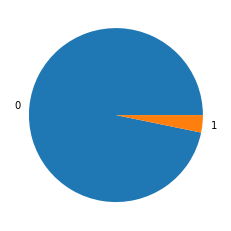

In [42]:
plt.pie(tab['Count'], labels= [0,1])

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Bankrupt'], axis=1),
    df['Bankrupt'],
    test_size=0.3,
    random_state=0)

In [57]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info


array([0.03064688, 0.01676661, 0.02144314, 0.03079279, 0.        ,
       0.00190459, 0.01397511, 0.        , 0.01235282, 0.03061914,
       0.04256758, 0.00743552, 0.00212786, 0.02339559, 0.00854363,
       0.00615972, 0.01192359, 0.011108  , 0.02202434, 0.03312612,
       0.01238331, 0.        , 0.02663003, 0.02684654, 0.03632999,
       0.03506385, 0.03447529, 0.01121128, 0.03959075, 0.        ,
       0.00371182, 0.00670087, 0.00904093, 0.00205649, 0.01588907,
       0.02079786, 0.        , 0.        , 0.02289524, 0.00769644,
       0.02661694, 0.00576042, 0.00071265, 0.01679241, 0.020025  ,
       0.02353103, 0.01616593, 0.01730169, 0.02221518, 0.00267712,
       0.00156093, 0.0212368 , 0.02151492, 0.01009023, 0.03456395,
       0.03416557, 0.00907229, 0.        , 0.        , 0.01906407,
       0.        , 0.00308102, 0.01098141, 0.00580058, 0.00970105,
       0.00817358, 0.00803819, 0.02693134, 0.00410827, 0.00080643,
       0.00754854, 0.03907703, 0.0271982 , 0.03673431, 0.03520

In [58]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.02956905, 0.01662651, 0.02013978, 0.0317028 , 0.00244582,
       0.        , 0.01355322, 0.00065874, 0.01383602, 0.03180961,
       0.0500582 , 0.00739913, 0.00147174, 0.02054642, 0.00693973,
       0.00622556, 0.01216438, 0.01111435, 0.02394117, 0.03431881,
       0.01125247, 0.00070042, 0.02698384, 0.02702725, 0.03250268,
       0.03478186, 0.03498723, 0.01035398, 0.03570554, 0.01183308,
       0.00289327, 0.02337227, 0.00099429, 0.00089897, 0.00575647,
       0.0060193 , 0.        , 0.        , 0.02535929, 0.00737399,
       0.02661694, 0.00576042, 0.00071265, 0.01679241, 0.020025  ,
       0.02353103, 0.01616593, 0.01739836, 0.02102948, 0.        ,
       0.        , 0.02103579, 0.02139022, 0.        , 0.03456395,
       0.03416557, 0.00907229, 0.        , 0.0053473 , 0.01906407,
       0.00418467, 0.00239688, 0.00464515, 0.00580058, 0.00984823,
       0.00817358, 0.00796725, 0.02680665, 0.        , 0.00020266,
       0.00754854, 0.03907703, 0.03089977, 0.02975278, 0.03520

In [59]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Persistent_EPS_in_the_Last_Four_Seasons    0.050058
Net_Income_to_Stockholder's_Equity         0.039077
Borrowing_dependency                       0.035706
Equity_to_Liability                        0.035202
Debt_ratio_%                               0.034987
                                             ...   
Research_and_development_expense_rate      0.000000
Liability-Assets_Flag                      0.000000
Long-term_Liability_to_Current_Assets      0.000000
Current_Liabilities/Liability              0.000000
Revenue_per_person                         0.000000
Length: 75, dtype: float64

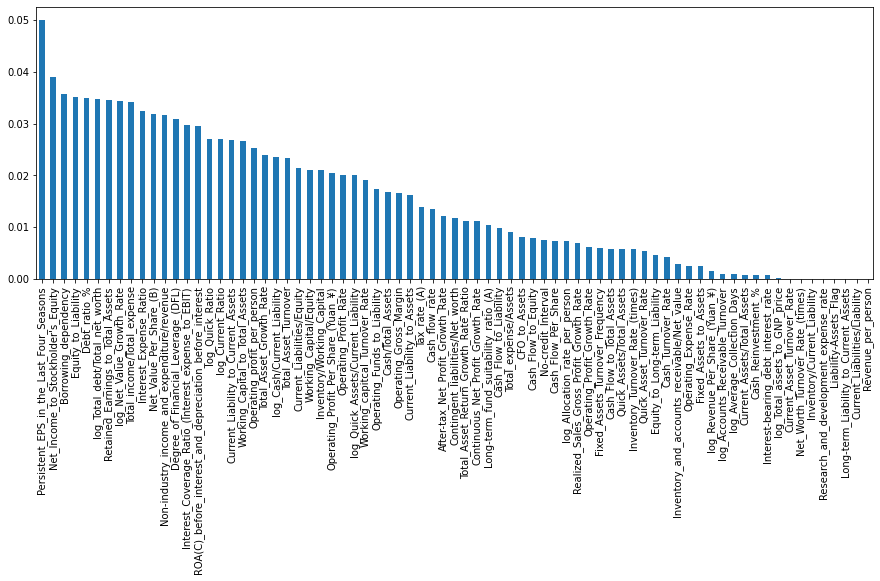

In [60]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [62]:
df.shape

(6819, 76)

In [61]:
from sklearn.feature_selection import SelectPercentile

In [70]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x7efe2dcc7200>)

In [71]:
selected_top_columns.get_support()

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True])

In [76]:
c=X_train.columns[selected_top_columns.get_support()]
c

Index(['ROA(C)_before_interest_and_depreciation_before_interest',
       'Operating_Gross_Margin', 'Operating_Profit_Rate',
       'Non-industry_income_and_expenditure/revenue', 'Cash_flow_rate',
       'Tax_rate_(A)', 'Net_Value_Per_Share_(B)',
       'Persistent_EPS_in_the_Last_Four_Seasons',
       'Operating_Profit_Per_Share_(Yuan_¥)',
       'After-tax_Net_Profit_Growth_Rate', 'log_Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'log_Current_Ratio',
       'log_Quick_Ratio', 'Interest_Expense_Ratio',
       'log_Total_debt/Total_net_worth', 'Debt_ratio_%',
       'Borrowing_dependency', 'Fixed_Assets_Turnover_Frequency',
       'Operating_profit_per_person', 'Working_Capital_to_Total_Assets',
       'Cash/Total_Assets', 'log_Quick_Assets/Current_Liability',
       'log_Cash/Current_Liability', 'Current_Liability_to_Assets',
       'Operating_Funds_to_Liability', 'Inventory/Working_Capital',
       'Working_Capital/Equity', 'Current_Liabilities/Equity',
     

In [73]:
X_train

,ROA(C)_before_interest_and_depreciation_before_interest,Operating_Gross_Margin,Operating_Profit_Rate,Non-industry_income_and_expenditure/revenue,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest-bearing_debt_interest_rate,Tax_rate_(A),Net_Value_Per_Share_(B),Persistent_EPS_in_the_Last_Four_Seasons,Cash_Flow_Per_Share,log_Revenue_Per_Share_(Yuan_¥),Operating_Profit_Per_Share_(Yuan_¥),Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,After-tax_Net_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,log_Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Cash_Reinvestment_%,log_Current_Ratio,log_Quick_Ratio,Interest_Expense_Ratio,log_Total_debt/Total_net_worth,Debt_ratio_%,Long-term_fund_suitability_ratio_(A),Borrowing_dependency,Contingent_liabilities/Net_worth,Inventory_and_accounts_receivable/Net_value,Total_Asset_Turnover,log_Accounts_Receivable_Turnover,log_Average_Collection_Days,Inventory_Turnover_Rate_(times),Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_(times),Revenue_per_person,Operating_profit_per_person,log_Allocation_rate_per_person,Working_Capital_to_Total_Assets,Quick_Assets/Total_Assets,Current_Assets/Total_Assets,Cash/Total_Assets,log_Quick_Assets/Current_Liability,log_Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Total_expense/Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Working_capitcal_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Equity_to_Long-term_Liability,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability-Assets_Flag,log_Total_assets_to_GNP_price,No-credit_Interval,Net_Income_to_Stockholder's_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Equity_to_Liability
4106,0.544728,0.614920,0.999125,0.303513,1.860591e-04,1.013619e-04,0.477433,0.000000,0.174410,0.197421,0.239671,0.334194,0.033878,0.121977,0.022169,0.848059,0.689460,0.217601,7.730000e+09,0.000490,0.264176,0.400563,0.016695,0.012255,0.630613,0.002489,0.063246,0.005316,0.369637,0.005366,0.398510,0.169415,0.002203,0.002858,8.370000e+09,2.345143e-04,0.032581,0.013695,0.399471,0.008000,0.859366,0.475947,0.615337,0.327229,0.012531,0.024600,0.068530,0.388679,0.277176,0.011418,0.996836,0.737652,0.328483,0.000000,0.944095,0.002395,0.039473,1.497487e-04,1.187078e-04,0.593987,2.249011e-04,0.315702,0.110933,0.718480,0.488575,0.666719,0.323558,0.017280,0,0.001645,0.623963,0.842300,0.026791,0.565159,0.060987
2799,0.613562,0.605731,0.999022,0.303745,1.413078e-04,5.760000e+08,0.471104,0.000371,0.166515,0.205554,0.277300,0.342010,0.076823,0.119046,0.022205,0.848179,0.689647,0.217622,1.143739e-04,0.000514,0.265109,0.394192,0.008703,0.007534,0.630635,0.006716,0.125767,0.006030,0.370529,0.005864,0.400707,0.305847,0.001639,0.003839,4.599128e-04,1.037915e-03,0.061129,0.016946,0.395434,0.002165,0.795319,0.481827,0.516323,0.024366,0.007905,0.001172,0.109929,0.364840,0.277142,0.002451,0.826323,0.735135,0.331225,0.000403,0.953717,0.002481,0.043100,7.360000e+08,7.350000e+09,0.593934,1.070000e+09,0.118600,0.111275,0.646644,0.460023,0.663555,0.315169,0.033150,0,0.002676,0.623824,0.845151,0.026797,0.565185,0.029589
1596,0.490567,0.622883,0.999106,0.303733,3.325706e-04,7.880000e+09,0.499602,0.000000,0.000000,0.203405,0.223315,0.321921,0.009365,0.101620,0.022032,0.847954,0.689286,0.217576,6.490000e+09,0.000457,0.263600,0.380323,0.089690,0.087042,0.630615,0.000155,0.004898,0.005251,0.369637,0.005366,0.394469,0.049475,0.000866,0.007247,3.213848e-04,6.510000e+09,0.014516,0.008754,0.396192,0.022665,0.867083,0.453728,0.447516,0.023773,0.087471,0.014122,0.008348,0.446990,0.276990,0.

In [75]:
X_test

,ROA(C)_before_interest_and_depreciation_before_interest,Operating_Gross_Margin,Operating_Profit_Rate,Non-industry_income_and_expenditure/revenue,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest-bearing_debt_interest_rate,Tax_rate_(A),Net_Value_Per_Share_(B),Persistent_EPS_in_the_Last_Four_Seasons,Cash_Flow_Per_Share,log_Revenue_Per_Share_(Yuan_¥),Operating_Profit_Per_Share_(Yuan_¥),Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,After-tax_Net_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,log_Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Cash_Reinvestment_%,log_Current_Ratio,log_Quick_Ratio,Interest_Expense_Ratio,log_Total_debt/Total_net_worth,Debt_ratio_%,Long-term_fund_suitability_ratio_(A),Borrowing_dependency,Contingent_liabilities/Net_worth,Inventory_and_accounts_receivable/Net_value,Total_Asset_Turnover,log_Accounts_Receivable_Turnover,log_Average_Collection_Days,Inventory_Turnover_Rate_(times),Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_(times),Revenue_per_person,Operating_profit_per_person,log_Allocation_rate_per_person,Working_Capital_to_Total_Assets,Quick_Assets/Total_Assets,Current_Assets/Total_Assets,Cash/Total_Assets,log_Quick_Assets/Current_Liability,log_Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Total_expense/Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Working_capitcal_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Equity_to_Long-term_Liability,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability-Assets_Flag,log_Total_assets_to_GNP_price,No-credit_Interval,Net_Income_to_Stockholder's_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Equity_to_Liability
4929,0.481207,0.596679,0.998884,0.303275,1.344852e-04,4.820000e+09,0.466685,0.000394,0.000000,0.159075,0.207053,0.320188,0.010713,0.091279,0.022002,0.847757,0.686199,0.216993,4.580000e+09,0.000405,0.262883,0.380845,0.008603,0.005327,0.630381,0.003192,0.076579,0.005374,0.372689,0.005413,0.396952,0.085457,0.001521,0.004135,9.440000e+09,1.240656e-04,0.022097,0.015371,0.387972,0.013164,0.776779,0.209596,0.307870,0.109339,0.005729,0.008581,0.066707,0.353553,0.277533,7.879714e-03,0.807899,0.733382,0.328558,0.004855,0.912063,0.001979,0.029445,1.189316e-04,8.290000e+09,0.593943,1.207609e-04,0.292813,0.112859,0.649374,0.461363,0.597398,0.315379,0.033529,0,0.004360,0.623901,0.837323,0.026709,0.564731,0.050237
6424,0.501828,0.613644,0.999065,0.303451,2.250286e-04,2.850000e+09,0.462639,0.000000,0.061039,0.184358,0.224922,0.319516,0.026578,0.108542,0.022075,0.848045,0.689271,0.217580,7.300000e+09,0.000452,0.263525,0.376076,0.014649,0.009450,0.630612,0.004671,0.100251,0.009182,0.369637,0.005366,0.397524,0.133433,0.000963,0.006514,7.001298e-03,1.311011e-03,0.030000,0.004280,0.393433,0.000355,0.887104,0.874064,0.840510,0.110759,0.014728,0.005472,0.106574,0.344414,0.276978,1.447024e-04,1.000000,0.740462,0.330437,0.000000,0.940492,0.002297,0.038491,2.651330e-04,2.826157e-04,0.594028,9.500000e+08,0.041199,0.110933,0.655207,0.462353,0.576943,0.316301,0.019727,0,0.000284,0.624245,0.841104,0.026791,0.565158,0.037879
3807,0.517574,0.598351,0.998982,0.303533,6.340000e+09,3.530000e+09,0.475229,0.000279,0.240004,0.176394,0.216224,0.324538,0.016541,0.096816,0.021994,0.847936,0.689157,0.217566,5.500000e+09,0.000429,0.263429,0.380994,0.010209,0.007928,0.630966,0.001936,0.051607,0.005054,0.370289,0.005366,0.396671,0.104948,0.001005,0.006240,2.222179e-04,8.470000e+09,0.023226,0.006990,0.392427,0.010967,0.781625,0.216891,0.268990,0.094533,0.008033,0.009991,0.049337,0.376775,0.2

In [77]:
X_train=X_train[c]
X_test=X_test[c]

In [78]:
X_test

,ROA(C)_before_interest_and_depreciation_before_interest,Operating_Gross_Margin,Operating_Profit_Rate,Non-industry_income_and_expenditure/revenue,Cash_flow_rate,Tax_rate_(A),Net_Value_Per_Share_(B),Persistent_EPS_in_the_Last_Four_Seasons,Operating_Profit_Per_Share_(Yuan_¥),After-tax_Net_Profit_Growth_Rate,log_Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,log_Current_Ratio,log_Quick_Ratio,Interest_Expense_Ratio,log_Total_debt/Total_net_worth,Debt_ratio_%,Borrowing_dependency,Fixed_Assets_Turnover_Frequency,Operating_profit_per_person,Working_Capital_to_Total_Assets,Cash/Total_Assets,log_Quick_Assets/Current_Liability,log_Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Working_Capital/Equity,Current_Liabilities/Equity,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Working_capitcal_Turnover_Rate,Current_Liability_to_Current_Assets,Net_Income_to_Stockholder's_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Equity_to_Liability
4929,0.481207,0.596679,0.998884,0.303275,0.466685,0.000000,0.159075,0.207053,0.091279,0.686199,0.000405,0.262883,0.008603,0.005327,0.630381,0.003192,0.076579,0.372689,1.240656e-04,0.387972,0.776779,0.109339,0.005729,0.008581,0.066707,0.353553,0.277533,0.733382,0.328558,0.912063,0.001979,0.593943,0.033529,0.837323,0.026709,0.564731,0.050237
6424,0.501828,0.613644,0.999065,0.303451,0.462639,0.061039,0.184358,0.224922,0.108542,0.689271,0.000452,0.263525,0.014649,0.009450,0.630612,0.004671,0.100251,0.369637,1.311011e-03,0.393433,0.887104,0.110759,0.014728,0.005472,0.106574,0.344414,0.276978,0.740462,0.330437,0.940492,0.002297,0.594028,0.019727,0.841104,0.026791,0.565158,0.037879
3807,0.517574,0.598351,0.998982,0.303533,0.475229,0.240004,0.176394,0.216224,0.096816,0.689157,0.000429,0.263429,0.010209,0.007928,0.630966,0.001936,0.051607,0.370289,8.470000e+09,0.392427,0.781625,0.094533,0.008033,0.009991,0.049337,0.376775,0.277244,0.733477,0.327758,0.933365,0.002310,0.593944,0.028315,0.840260,0.026882,0.565555,0.074581
2011,0.521669,0.599101,0.999007,0.303566,0.465231,0.000000,0.178838,0.233053,0.105773,0.689626,0.000491,0.264303,0.025560,0.021191,0.631003,0.003685,0.085074,0.373207,4.846125e-03,0.406673,0.878706,0.135136,0.025662,0.015994,0.043740,0.346222,0.276976,0.739364,0.327802,0.944490,0.002551,0.593965,0.011149,0.842316,0.026932,0.565750,0.045051
6728,0.492176,0.618105,0.999083,0.303401,0.465023,0.564328,0.169441,0.217737,0.107727,0.689140,0.000453,0.261310,0.006965,0.004980,0.631947,0.010889,0.161865,0.379304,2.632612e-04,0.396701,0.769527,0.022242,0.005997,0.000954,0.123328,0.348597,0.277495,0.733645,0.333345,0.933467,0.002251,0.593936,0.041220,0.840533,0.027033,0.566098,0.022209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,0.565544,0.625276,0.999265,0.303666,0.477532,0.000000,0.172348,0.229933,0.106180,0.690209,0.000685,0.266232,0.029931,0.024820,0.630698,0.001162,0.033286,0.369648,7.870000e+08,0.399652,0.877376,0.335065,0.025318,0.047635,0.035162,0.385468,0.277076,0.737844,0.327225,0.941131,0.002668,0.594135,0.009450,0.842233,0.026818,0.565283,0.113022
5961,0.493004,0.603619,0.999039,0.303490,0.474865,0.225630,0.184653,0.222086,0.106099,0.689403,0.000457,0.263973,0.021948,0.018711,0.630676,0.002049,0.054086,0.370258,1.421989e-02,0.406832,0.855963,0.100870,0.021934,0.011851,0.044250,0.370892,0.276979,0.737264,0.327610,0.937921,0.002341,0.593980,0.013057,0.840890,0.026807,0.565232,0.071230
4623,0.523083,0.608296,0.999059,0.303456,0.464748,0.049499,0.178290,0.235038,0.120674,0.689811,0.000507,0.264391,0.009578,0.005217,0.631279,0.009059,0.148048,0.375692,3.457195e-04,0.398849,0.815485,0.085270,0.005821,0.003708,0.121357,0.348535,0.277505,0.737278,0.332579,0.939987,0.002325,0.593946,0.030161,0.842350,0.027020,0.566056,0.024620
4783,0.528299,0.608239,0.999086,0.303555,0.471

In [79]:
X_train

,ROA(C)_before_interest_and_depreciation_before_interest,Operating_Gross_Margin,Operating_Profit_Rate,Non-industry_income_and_expenditure/revenue,Cash_flow_rate,Tax_rate_(A),Net_Value_Per_Share_(B),Persistent_EPS_in_the_Last_Four_Seasons,Operating_Profit_Per_Share_(Yuan_¥),After-tax_Net_Profit_Growth_Rate,log_Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,log_Current_Ratio,log_Quick_Ratio,Interest_Expense_Ratio,log_Total_debt/Total_net_worth,Debt_ratio_%,Borrowing_dependency,Fixed_Assets_Turnover_Frequency,Operating_profit_per_person,Working_Capital_to_Total_Assets,Cash/Total_Assets,log_Quick_Assets/Current_Liability,log_Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Working_Capital/Equity,Current_Liabilities/Equity,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Working_capitcal_Turnover_Rate,Current_Liability_to_Current_Assets,Net_Income_to_Stockholder's_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Equity_to_Liability
4106,0.544728,0.614920,0.999125,0.303513,0.477433,0.174410,0.197421,0.239671,0.121977,0.689460,0.000490,0.264176,0.016695,0.012255,0.630613,0.002489,0.063246,0.369637,2.345143e-04,0.399471,0.859366,0.327229,0.012531,0.024600,0.068530,0.388679,0.277176,0.737652,0.328483,0.944095,0.002395,0.593987,0.017280,0.842300,0.026791,0.565159,0.060987
2799,0.613562,0.605731,0.999022,0.303745,0.471104,0.166515,0.205554,0.277300,0.119046,0.689647,0.000514,0.265109,0.008703,0.007534,0.630635,0.006716,0.125767,0.370529,1.037915e-03,0.395434,0.795319,0.024366,0.007905,0.001172,0.109929,0.364840,0.277142,0.735135,0.331225,0.953717,0.002481,0.593934,0.033150,0.845151,0.026797,0.565185,0.029589
1596,0.490567,0.622883,0.999106,0.303733,0.499602,0.000000,0.203405,0.223315,0.101620,0.689286,0.000457,0.263600,0.089690,0.087042,0.630615,0.000155,0.004898,0.369637,6.510000e+09,0.396192,0.867083,0.023773,0.087471,0.014122,0.008348,0.446990,0.276990,0.736835,0.326400,0.938705,0.002438,0.594164,0.002775,0.841089,0.026792,0.565162,0.470951
2278,0.436796,0.591879,0.998903,0.303487,0.455108,0.000000,0.158105,0.197126,0.083869,0.688990,0.000397,0.263663,0.006911,0.003626,0.630122,0.030439,0.230069,0.386384,4.190998e-04,0.387486,0.781946,0.007700,0.005404,0.000190,0.214923,0.323729,0.277790,0.737654,0.351230,0.923407,0.001874,0.593942,0.041534,0.836575,0.026654,0.564408,0.014466
1493,0.537757,0.627070,0.999319,0.303586,0.484727,0.198401,0.216552,0.239955,0.122384,0.689381,0.000482,0.263862,0.064503,0.063614,0.630612,0.000499,0.015237,0.369637,1.452476e-04,0.417539,0.928822,0.278024,0.063746,0.069482,0.019341,0.409695,0.276983,0.739717,0.326715,0.944664,0.002701,0.594183,0.004087,0.842009,0.026791,0.565158,0.220639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.473505,0.603735,0.998988,0.303389,0.462560,0.000000,0.174118,0.212158,0.096735,0.689067,0.000439,0.263539,0.011415,0.006977,0.626027,0.006591,0.124376,0.375592,1.444911e-04,0.392800,0.800235,0.045667,0.007069,0.003897,0.061599,0.342306,0.277383,0.735460,0.328986,0.930339,0.002192,0.594001,0.025338,0.839765,0.026272,0.560288,0.029950
3264,0.630868,0.623222,0.999244,0.303492,0.484338,0.047576,0.196199,0.268696,0.147056,0.689898,0.000559,0.265997,0.025535,0.020867,0.630665,0.003716,0.085558,0.372405,5.318179e-04,0.416702,0.885076,0.145309,0.020960,0.016356,0.045997,0.375438,0.277097,0.739753,0.327890,0.956858,0.002526,0.594001,0.011161,0.845045,0.026807,0.565231,0.044773
1653,0.546044,0.602827,0.999045,0.303812,0.469203,0.098391,0.221862,0.255555,0.110170,0.689572,0.000501,0.264450,0.010602,0.009403,0.630650,0.003920,0.088884,0.370042,6.528576e-04,0.396667,0.793918,0.166360,0.009489,0.013716,0.063140,0.356293,0.277108,0.734483,0.328565,0.948490,0.003111,0.593955,0.027271,0.842829,0.026802,0.565208,0.043021
2607,0.505436,0.608541,0.999132,0.303899,0.482

In [80]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [82]:

os=SMOTETomek(1)
X_train,y_train=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({0: 4587, 1: 4587})
The number of classes after fit Counter({0: 4587, 1: 4587})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [83]:
!pip install tpot

     |████████████████████████████████| 92kB 6.6MB/s 
     |████████████████████████████████| 163kB 28.9MB/s 
     |████████████████████████████████| 166.7MB 82kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=1a50673cdaf141aa8192d7ae5842c840958c2e0ce705cef08f86b2afd40ea4e6
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [84]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.9844120889406577

Generation 2 - Current best internal CV score: 0.9844120889406577

Generation 3 - Current best internal CV score: 0.9844120889406577

Generation 4 - Current best internal CV score: 0.9844120889406577

Generation 5 - Current best internal CV score: 0.9845210807662707

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.5, max_depth=6, max_features=0.8500000000000001, min_samples_leaf=19, min_samples_split=17, n_estimators=100, subsample=0.8500000000000001), bootstrap=False, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
0.956989247311828
